<a href="https://colab.research.google.com/github/oxzoid/ucs654_clustering_102203279/blob/main/ucs654_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)


In [3]:
# Define preprocessing pipelines
def no_processing(X):
    return X

def normalize(X):
    return MinMaxScaler().fit_transform(X)

def transform(X):
    return StandardScaler().fit_transform(X)

def apply_pca(X):
    return PCA(n_components=2).fit_transform(X)

def transform_then_normalize(X):
    return MinMaxScaler().fit_transform(StandardScaler().fit_transform(X))

def transform_norm_pca(X):
    return PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(StandardScaler().fit_transform(X)))

preprocessors = {
    'No Data Processing': no_processing,
    'Using Normalization': normalize,
    'Using Transform': transform,
    'Using PCA': apply_pca,
    'Using T+N': transform_then_normalize,
    'T+N+PCA': transform_norm_pca
}


In [4]:
def get_kmeans(k): return KMeans(n_clusters=k, random_state=0)
def get_hierarchical(k): return AgglomerativeClustering(n_clusters=k)
def get_meanshift(k=None): return MeanShift()

clusterers = {
    'K-Mean Clustering': get_kmeans,
    'Hierarchical Clustering': get_hierarchical,
    'K-mean Shift Clustering': get_meanshift
}


In [5]:
def evaluate(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldins': davies_bouldin_score(X, labels)
    }


In [6]:
results = []

for algo_name, algo_func in clusterers.items():
    for prep_name, prep_func in preprocessors.items():
        X_proc = prep_func(X)

        if algo_name == 'K-mean Shift Clustering':
            model = algo_func()
            labels = model.fit_predict(X_proc)
            try:
                scores = evaluate(X_proc, labels)
                results.append({
                    'Algorithm': algo_name,
                    'Preprocessing': prep_name,
                    'Clusters': len(np.unique(labels)),
                    **scores
                })
            except:
                pass
        else:
            for k in [3, 4, 5]:
                model = algo_func(k)
                try:
                    labels = model.fit_predict(X_proc)
                    scores = evaluate(X_proc, labels)
                    results.append({
                        'Algorithm': algo_name,
                        'Preprocessing': prep_name,
                        'Clusters': k,
                        **scores
                    })
                except:
                    pass

results_df = pd.DataFrame(results)


In [7]:
results_df

,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldins
0,K-Mean Clustering,No Data Processing,3,0.551192,561.593732,0.666039
1,K-Mean Clustering,No Data Processing,4,0.498051,530.765808,0.780307
2,K-Mean Clustering,No Data Processing,5,0.460950,459.451470,0.915314
3,K-Mean Clustering,Using Normalization,3,0.482929,351.295064,0.786733
4,K-Mean Clustering,Using Normalization,4,0.445065,314.472999,0.900449
5,K-Mean Clustering,Using Normalization,5,0.436406,269.942893,0.931870
6,K-Mean Clustering,Using Transform,3,0.459948,241.904402,0.833595
7,K-Mean Clustering,Using Transform,4,0.386941,207.265914,0.869814
8,K-Mean Clustering,Using Transform,5,0.345511,203.267419,0.945173
9,K-Mean Clustering,Using PCA,3,0.597676,693.708433,0.564816


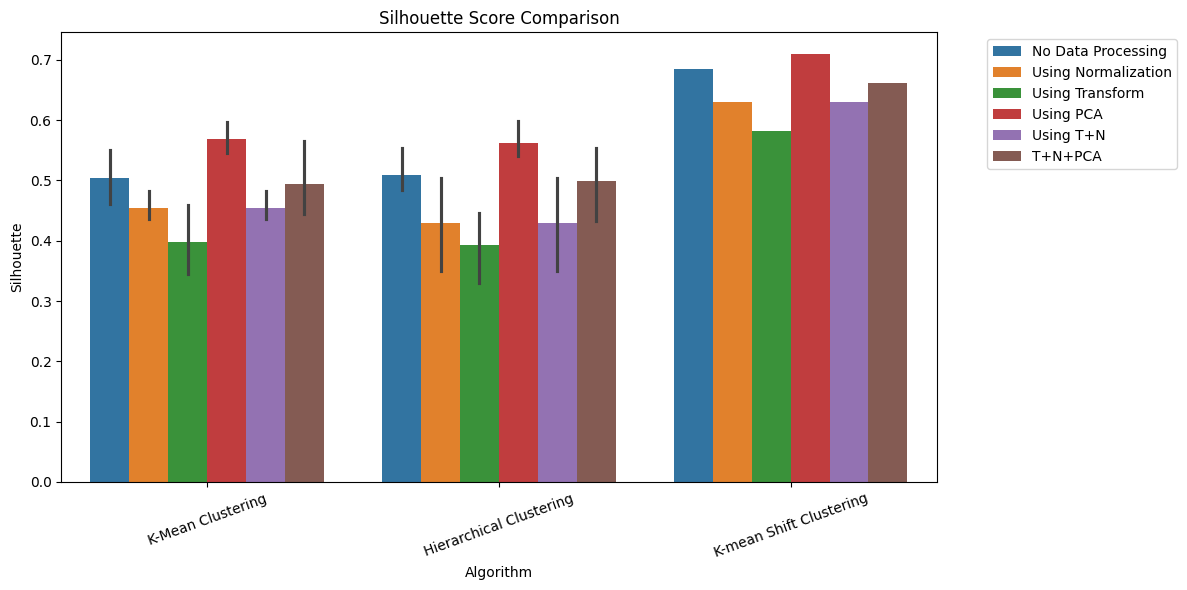

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x='Algorithm', y='Silhouette', hue='Preprocessing')
plt.title("Silhouette Score Comparison")
plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
